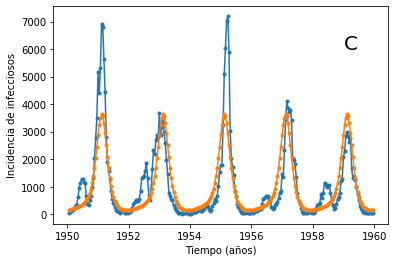

In [14]:
#Figura 3. Series de tiempo de los individuos infectados predichos por el modelo SEIR vs. casos reportados 

#LHD Londres

from numpy import hstack,vstack,linspace,cos,exp,log,where,ones
from scipy import pi,array,zeros,loadtxt,eye,special
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,mean,nonzero, str
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
from numpy import load,where,savetxt,copy
import sys
import xlrd

book = xlrd.open_workbook("60measles.xls")
sheet1 = book.sheet_by_index(0)
data_set = 27 #Londres
rowValues = sheet1.col_values(data_set+1, start_rowx=1)    
sheet2 = book.sheet_by_index(1)
colValues = sheet2.row_values(data_set, start_colx=2)
N = sheet2.row_values(data_set, start_colx=1, end_colx=2)[0]
city_name = str(sheet2.row_values(data_set, start_colx=0, end_colx=1)[0])

def funcionSIRSLHD(y, t, p):
    f = zeros([4])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[2]**2/(y[2] + p[2])
    f[0] = mu - betaIS - mu*y[0]
    f[1] = betaIS - (sigma + mu)*y[1]
    f[2] = sigma*y[1] - (nu + mu)*y[2]
    f[3] = nu*y[2] - mu*y[3]
    return f

def evaluarLHD(p): 
    k = 4
    dt = p[3]/(12.0*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,E0,I0,R0]
    y0 = integrate.odeint(funcionSIRSLHD,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    ySoln_romb = integrate.odeint(funcionSIRSLHD,y0,t_romb,args=(p,))*N
    ee = copy(ySoln_romb[0:-1,1])
    ee.shape = n,2**k
    een = copy(ee[:,0])
    een.shape = n,1
    een[0:-1] = een[1:]
    een[-1] = ySoln_romb[-1,1]
    ee = hstack((ee,een))
    result = array(list(map(integrate.romb,sigma*ee,dt)))
    result.shape = n
    return result    

def graficarLondresSIRSLHD(p):
    xlabel('Tiempo (años)')
    ylabel('Incidencia de infecciosos')
    ySoln = evaluarLHD(p)
    plot(tdata+1950.0,data,'.-')
    plot(tdata+1950.0,ySoln,'.-')
    text(1959.0,6000.0,'C',fontsize=20)        
    show()

Ninit = 1000
sigma = 365.0/8.0
nu = 365.0/5.0
mu = 0.02
S0 = 0.8
E0 = 0.05
I0 = 0.05
R0 = 1.0-S0-E0-I0

data = rowValues[157:416]
n = len(data)
tdata = linspace(1.0/26.0,n/26.0,n)

q = array([ 1.54158397e+03,  4.80365364e-02,  4.68550557e-12,  1.94290871e-01, -1.77577417e+06])
#b0, b1, theta, c
graficarLondresSIRSLHD(q)

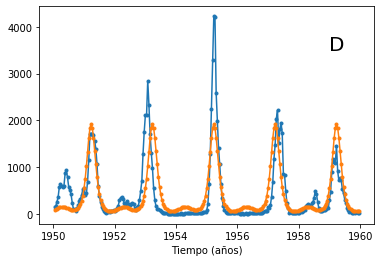

In [15]:
#LHD Birmingham

from numpy import hstack,vstack,linspace,cos,exp,log,where,ones
from scipy import pi,array,zeros,loadtxt,eye,special
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,mean,nonzero, str
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
from numpy import load,where,savetxt,copy
import sys
import xlrd

book = xlrd.open_workbook("60measles.xls")
sheet1 = book.sheet_by_index(0)
data_set = 3 #Birmingham
rowValues = sheet1.col_values(data_set+1, start_rowx=1)    
sheet2 = book.sheet_by_index(1)
colValues = sheet2.row_values(data_set, start_colx=2)
N = sheet2.row_values(data_set, start_colx=1, end_colx=2)[0]
city_name = str(sheet2.row_values(data_set, start_colx=0, end_colx=1)[0])

def funcionSIRSLHD(y, t, p):
    f = zeros([4])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[2]**2/(y[2] + p[2])
    f[0] = mu - betaIS - mu*y[0]
    f[1] = betaIS - (sigma + mu)*y[1]
    f[2] = sigma*y[1] - (nu + mu)*y[2]
    f[3] = nu*y[2] - mu*y[3]
    return f  

def evaluarLHD(p): 
    k = 4
    dt = p[3]/(12.0*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,E0,I0,R0]
    y0 = integrate.odeint(funcionSIRSLHD,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    ySoln_romb = integrate.odeint(funcionSIRSLHD,y0,t_romb,args=(p,))*N
    ee = copy(ySoln_romb[0:-1,1])
    ee.shape = n,2**k
    een = copy(ee[:,0])
    een.shape = n,1
    een[0:-1] = een[1:]
    een[-1] = ySoln_romb[-1,1]
    ee = hstack((ee,een))
    result = array(list(map(integrate.romb,sigma*ee,dt)))
    result.shape = n
    return result

def graficarBirminghamSIRSLHD(p):
    xlabel('Tiempo (años)')
    ySoln = evaluarLHD(p)
    plot(tdata+1950.0,data,'.-')
    plot(tdata+1950.0,ySoln,'.-')
    text(1959.0,3500.0,'D',fontsize=20)        
    show()

Ninit = 1000
sigma = 365.0/8.0
nu = 365.0/5.0
mu = 0.02
S0 = 0.8
E0 = 0.05
I0 = 0.05
R0 = 1.0-S0-E0-I0

pl = array([1000.0, 0.0, 0.0, 0.0])
pu = array([2000.0, 1.0, 1.0, 1.0])
l = 10
u = 9

data = rowValues[157:416]
n = len(data)
tdata = linspace(1.0/26.0,n/26.0,n)

q = array([ 1.25361887e+03,  1.45588052e-01,  1.42266732e-14,  2.41125650e-01 ])
graficarBirminghamSIRSLHD(q)


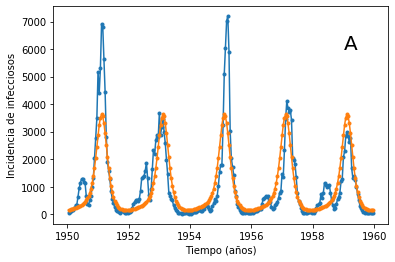

In [16]:
#Classic London

from numpy import hstack,vstack,linspace,cos,exp,log,where,ones
from scipy import pi,array,zeros,loadtxt,eye,special
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,mean,nonzero, str
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
from numpy import load,where,savetxt,copy
import sys
import xlrd

book = xlrd.open_workbook("60measles.xls")
sheet1 = book.sheet_by_index(0)
data_set = 27 #Londres
rowValues = sheet1.col_values(data_set+1, start_rowx=1)    
sheet2 = book.sheet_by_index(1)
colValues = sheet2.row_values(data_set, start_colx=2)
N = sheet2.row_values(data_set, start_colx=1, end_colx=2)[0]
city_name = str(sheet2.row_values(data_set, start_colx=0, end_colx=1)[0])

def funcionSIRSClasica(y, t, p):
    f = zeros([4])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[2]
    f[0] = mu - betaIS - mu*y[0]
    f[1] = betaIS - (sigma + mu)*y[1]
    f[2] = sigma*y[1] - (nu + mu)*y[2]
    f[3] = nu*y[2] - mu*y[3]
    return f

def evaluarClasica(p): 
    k = 4
    dt = p[3]/(12.0*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,E0,I0,R0]
    y0 = integrate.odeint(funcionSIRSClasica,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    ySoln_romb = integrate.odeint(funcionSIRSClasica,y0,t_romb,args=(p,))*N
    ee = copy(ySoln_romb[0:-1,1])
    ee.shape = n,2**k
    een = copy(ee[:,0])
    een.shape = n,1
    een[0:-1] = een[1:]
    een[-1] = ySoln_romb[-1,1]
    ee = hstack((ee,een))
    result = array(list(map(integrate.romb,sigma*ee,dt)))
    result.shape = n
    return result    

def graficarLondresSIRSClasico(p):
    xlabel('Tiempo (años)')
    ylabel('Incidencia de infecciosos')
    ySoln = evaluarClasica(p)
    plot(tdata+1950.0,data,'.-')
    plot(tdata+1950.0,ySoln,'.-')
    text(1959.0,6000.0,'A',fontsize=20)        
    show()

Ninit = 1000
sigma = 365.0/8.0
nu = 365.0/5.0
mu = 0.02
S0 = 0.8
E0 = 0.05
I0 = 0.05
R0 = 1.0-S0-E0-I0

data = rowValues[157:416]
n = len(data)
tdata = linspace(1.0/26.0,n/26.0,n)
#q = array([ 1.59636315e+03, 5.02101281e-02, 0, 1.89961968e-01 ])
q = array([ 1.54158397e+03,  4.80365364e-02,  4.68550557e-12,  1.94290871e-01 ])
#b0, b1, theta, c
graficarLondresSIRSClasico(q)

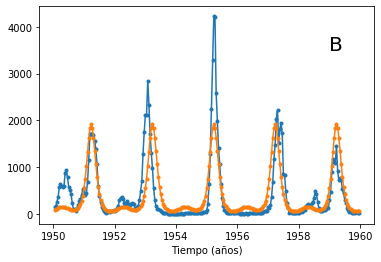

In [17]:
#Classic Birmingham

from numpy import hstack,vstack,linspace,cos,exp,log,where,ones
from scipy import pi,array,zeros,loadtxt,eye,special
from scipy import integrate,linalg,optimize,interpolate
from numpy import random,mean,nonzero, str
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
from numpy import load,where,savetxt,copy
import sys
import xlrd

book = xlrd.open_workbook("60measles.xls")
sheet1 = book.sheet_by_index(0)
data_set = 3 #Birmingham
rowValues = sheet1.col_values(data_set+1, start_rowx=1)    
sheet2 = book.sheet_by_index(1)
colValues = sheet2.row_values(data_set, start_colx=2)
N = sheet2.row_values(data_set, start_colx=1, end_colx=2)[0]
city_name = str(sheet2.row_values(data_set, start_colx=0, end_colx=1)[0]) 

def funcionSIRSClasica(y, t, p):
    f = zeros([4])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[2]
    f[0] = mu - betaIS - mu*y[0]
    f[1] = betaIS - (sigma + mu)*y[1]
    f[2] = sigma*y[1] - (nu + mu)*y[2]
    f[3] = nu*y[2] - mu*y[3]
    return f

def evaluarClasica(p): 
    k = 4
    dt = p[3]/(12.0*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,E0,I0,R0]
    y0 = integrate.odeint(funcionSIRSClasica,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    ySoln_romb = integrate.odeint(funcionSIRSClasica,y0,t_romb,args=(p,))*N
    ee = copy(ySoln_romb[0:-1,1])
    ee.shape = n,2**k
    een = copy(ee[:,0])
    een.shape = n,1
    een[0:-1] = een[1:]
    een[-1] = ySoln_romb[-1,1]
    ee = hstack((ee,een))
    result = array(list(map(integrate.romb,sigma*ee,dt)))
    result.shape = n
    return result 

def graficarBirminghamSIRSClasico(p):
    xlabel('Tiempo (años)')
    ySoln = evaluarClasica(p)
    plot(tdata+1950.0,data,'.-')
    plot(tdata+1950.0,ySoln,'.-')
    text(1959.0,3500.0,'B',fontsize=20)        
    show()

Ninit = 1000
sigma = 365.0/8.0
nu = 365.0/5.0
mu = 0.02
S0 = 0.8
E0 = 0.05
I0 = 0.05
R0 = 1.0-S0-E0-I0

pl = array([1000.0, 0.0, 0.0, 0.0])
pu = array([2000.0, 1.0, 1.0, 1.0])
l = 10
u = 9

data = rowValues[157:416]
n = len(data)
tdata = linspace(1.0/26.0,n/26.0,n)

q = array([ 1.25361887e+03,  1.45588052e-01,  1.42266732e-14,  2.41125650e-01 ])
graficarBirminghamSIRSClasico(q)
